# Hi!

The implemented models are ***Machine Learning*** algorithms and ***SMOTE*** technique. Also visualized performances of the models using ***Seaborn, Matplotlib*** and ***Plotly*** in a variety of ways.

---
---


# Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions. <br>

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent.
First of all, I analyze and recognize the data well in order to draw my roadmap and choose the correct arguments I will use. Accordingly, I examine the frequency distributions of variables. I observe variable correlations and want to explore multicollinearity. I show the distribution of the target variable's classes over other variables. 

---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff
import cufflinks as cf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df = data.copy()
df.sample(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140035,83502.0,-0.600715,0.701079,2.329212,2.489529,0.102883,0.619412,0.038719,0.314017,-0.680651,...,0.240201,0.810977,-0.095444,0.111844,-0.307788,0.200561,0.171587,0.155823,23.76,0
40620,40321.0,-0.959095,0.528408,1.083110,-0.055785,0.752203,-0.203004,0.410002,0.192593,-0.561038,...,-0.223863,-0.462113,0.422562,-0.363733,-0.108913,0.110930,0.192322,0.025649,2.28,0
213445,139259.0,-4.505131,1.206674,-2.442704,-0.168619,-1.372286,-1.326015,-0.321063,1.757803,0.289223,...,-0.252121,-0.627364,-0.145266,-0.108497,0.260524,-0.086602,-0.374628,-0.061765,110.00,0
212243,138778.0,-0.257641,-0.121100,1.479809,-2.363608,-0.306240,0.114944,-0.283186,0.217228,-0.814887,...,0.563476,1.621433,-0.296039,0.825530,-0.209371,-0.168436,0.157293,0.157651,2.04,0
133116,80254.0,-3.504999,2.892924,-1.548616,-1.644712,-1.130891,-0.048727,-1.563452,2.546492,-0.871279,...,0.288376,-0.095386,0.158928,-1.096405,-0.069475,0.787658,-1.197431,-0.167839,0.90,0
273737,165679.0,-0.238450,1.106254,-0.464830,0.066698,0.814769,-0.208741,1.115926,-0.051246,-0.358012,...,0.292133,0.935378,-0.361907,-1.050507,0.174063,-0.465868,-0.312553,-0.276564,59.70,0
171541,120686.0,-0.003591,-1.069256,1.429595,-2.774489,-1.527641,1.000296,-1.237159,0.452714,-1.100358,...,0.114966,0.638836,-0.049496,0.028539,-0.569506,-0.143945,0.024143,0.030094,75.89,0


### Exploratory Data Analysis

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace=True)

## Class Analysis against other Features

#### Distribution of 1,0 in Class

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


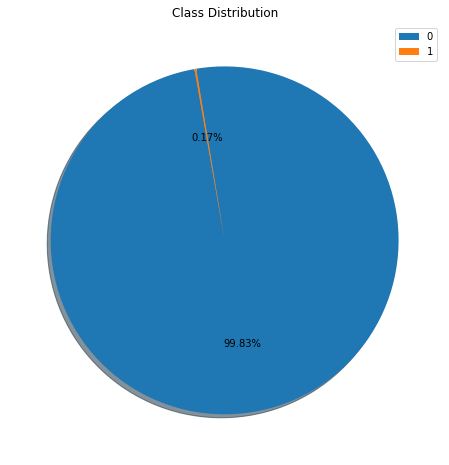

In [8]:
# The classes are heavily skewed we need to solve this issue later.
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(df['Class'].value_counts(), explode=explode,autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

In [9]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

##### Dataset is highly imbalanced

In [10]:
#legit
df[df.Class == 0].Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
#fraud
df[df.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Corr of other features with Class

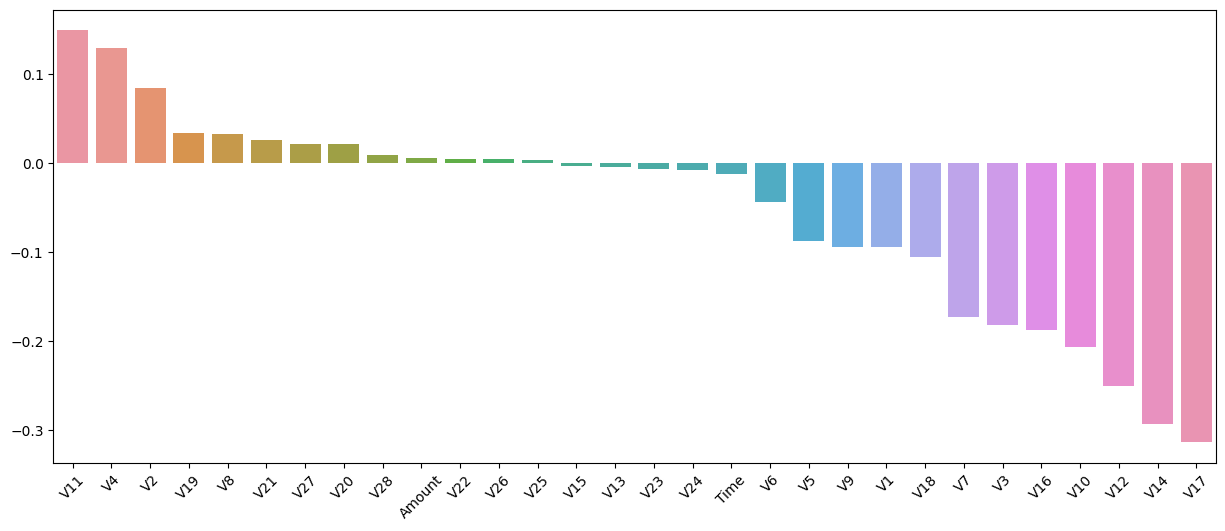

In [12]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)
plt.xticks(rotation = 45);

### Exploring Highly Correlated Features

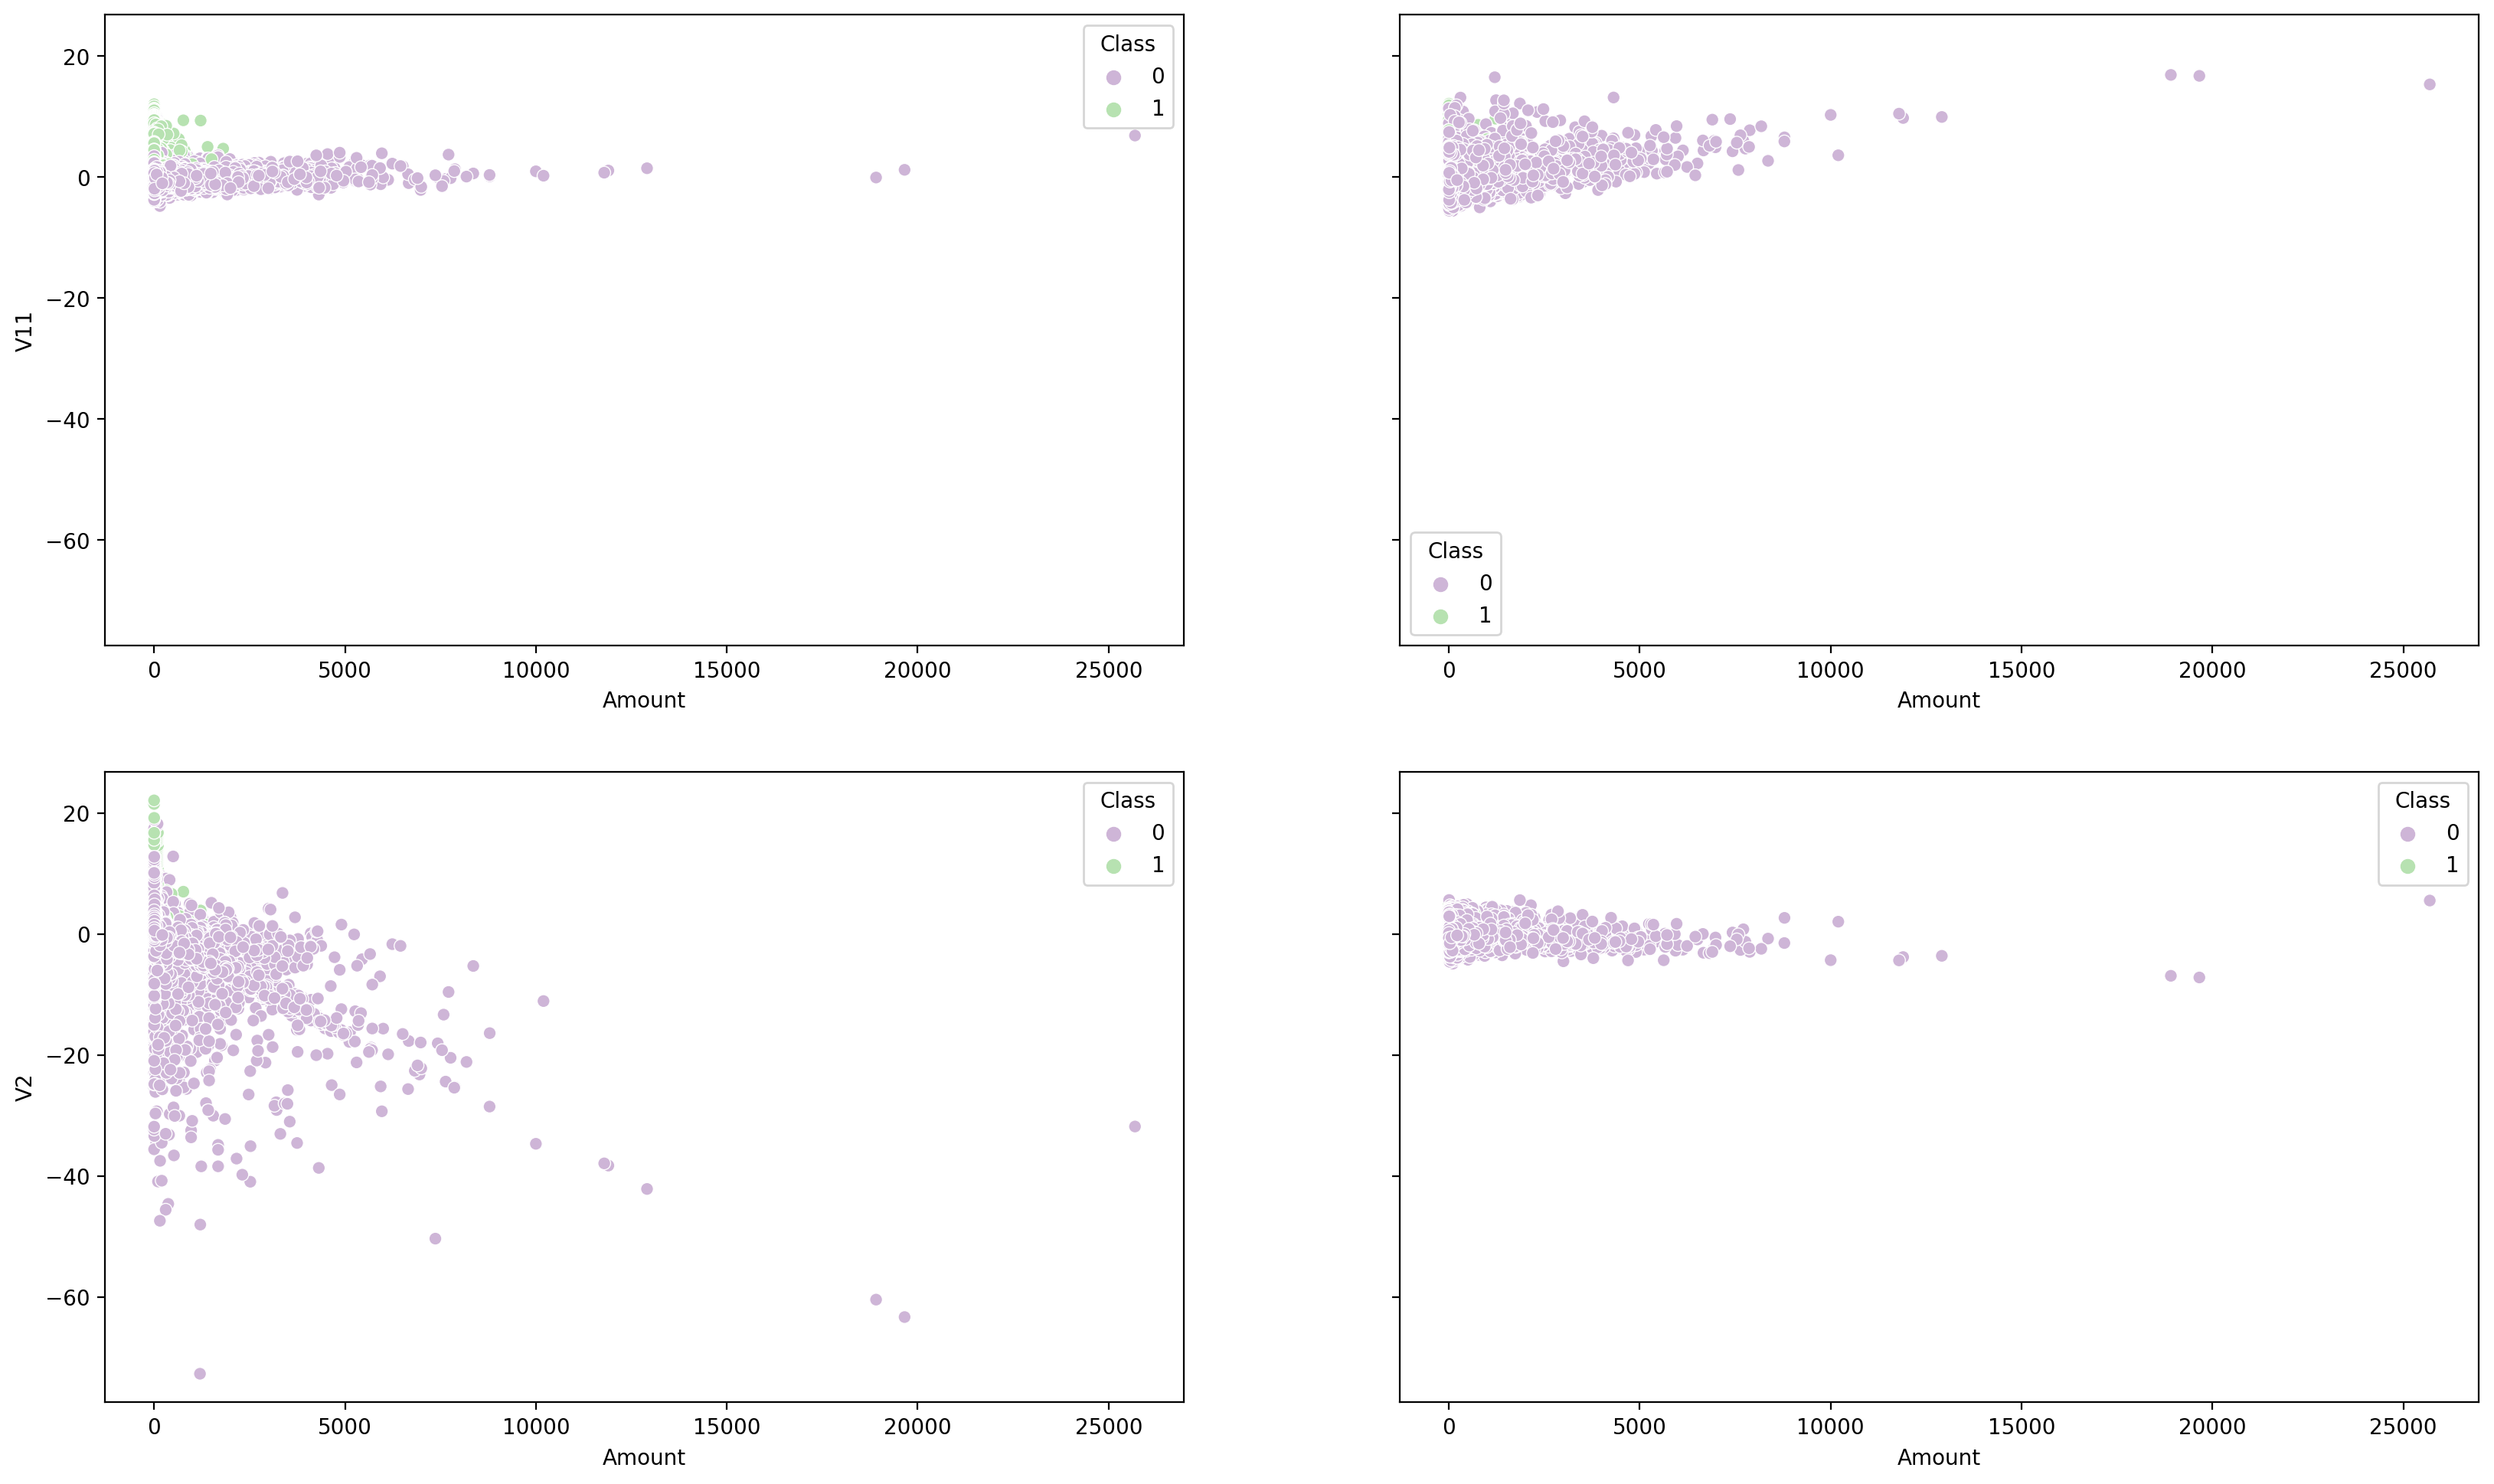

In [13]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V11', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V4', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V2', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V19', hue = 'Class',  ax=ax[1,1], palette='PRGn');

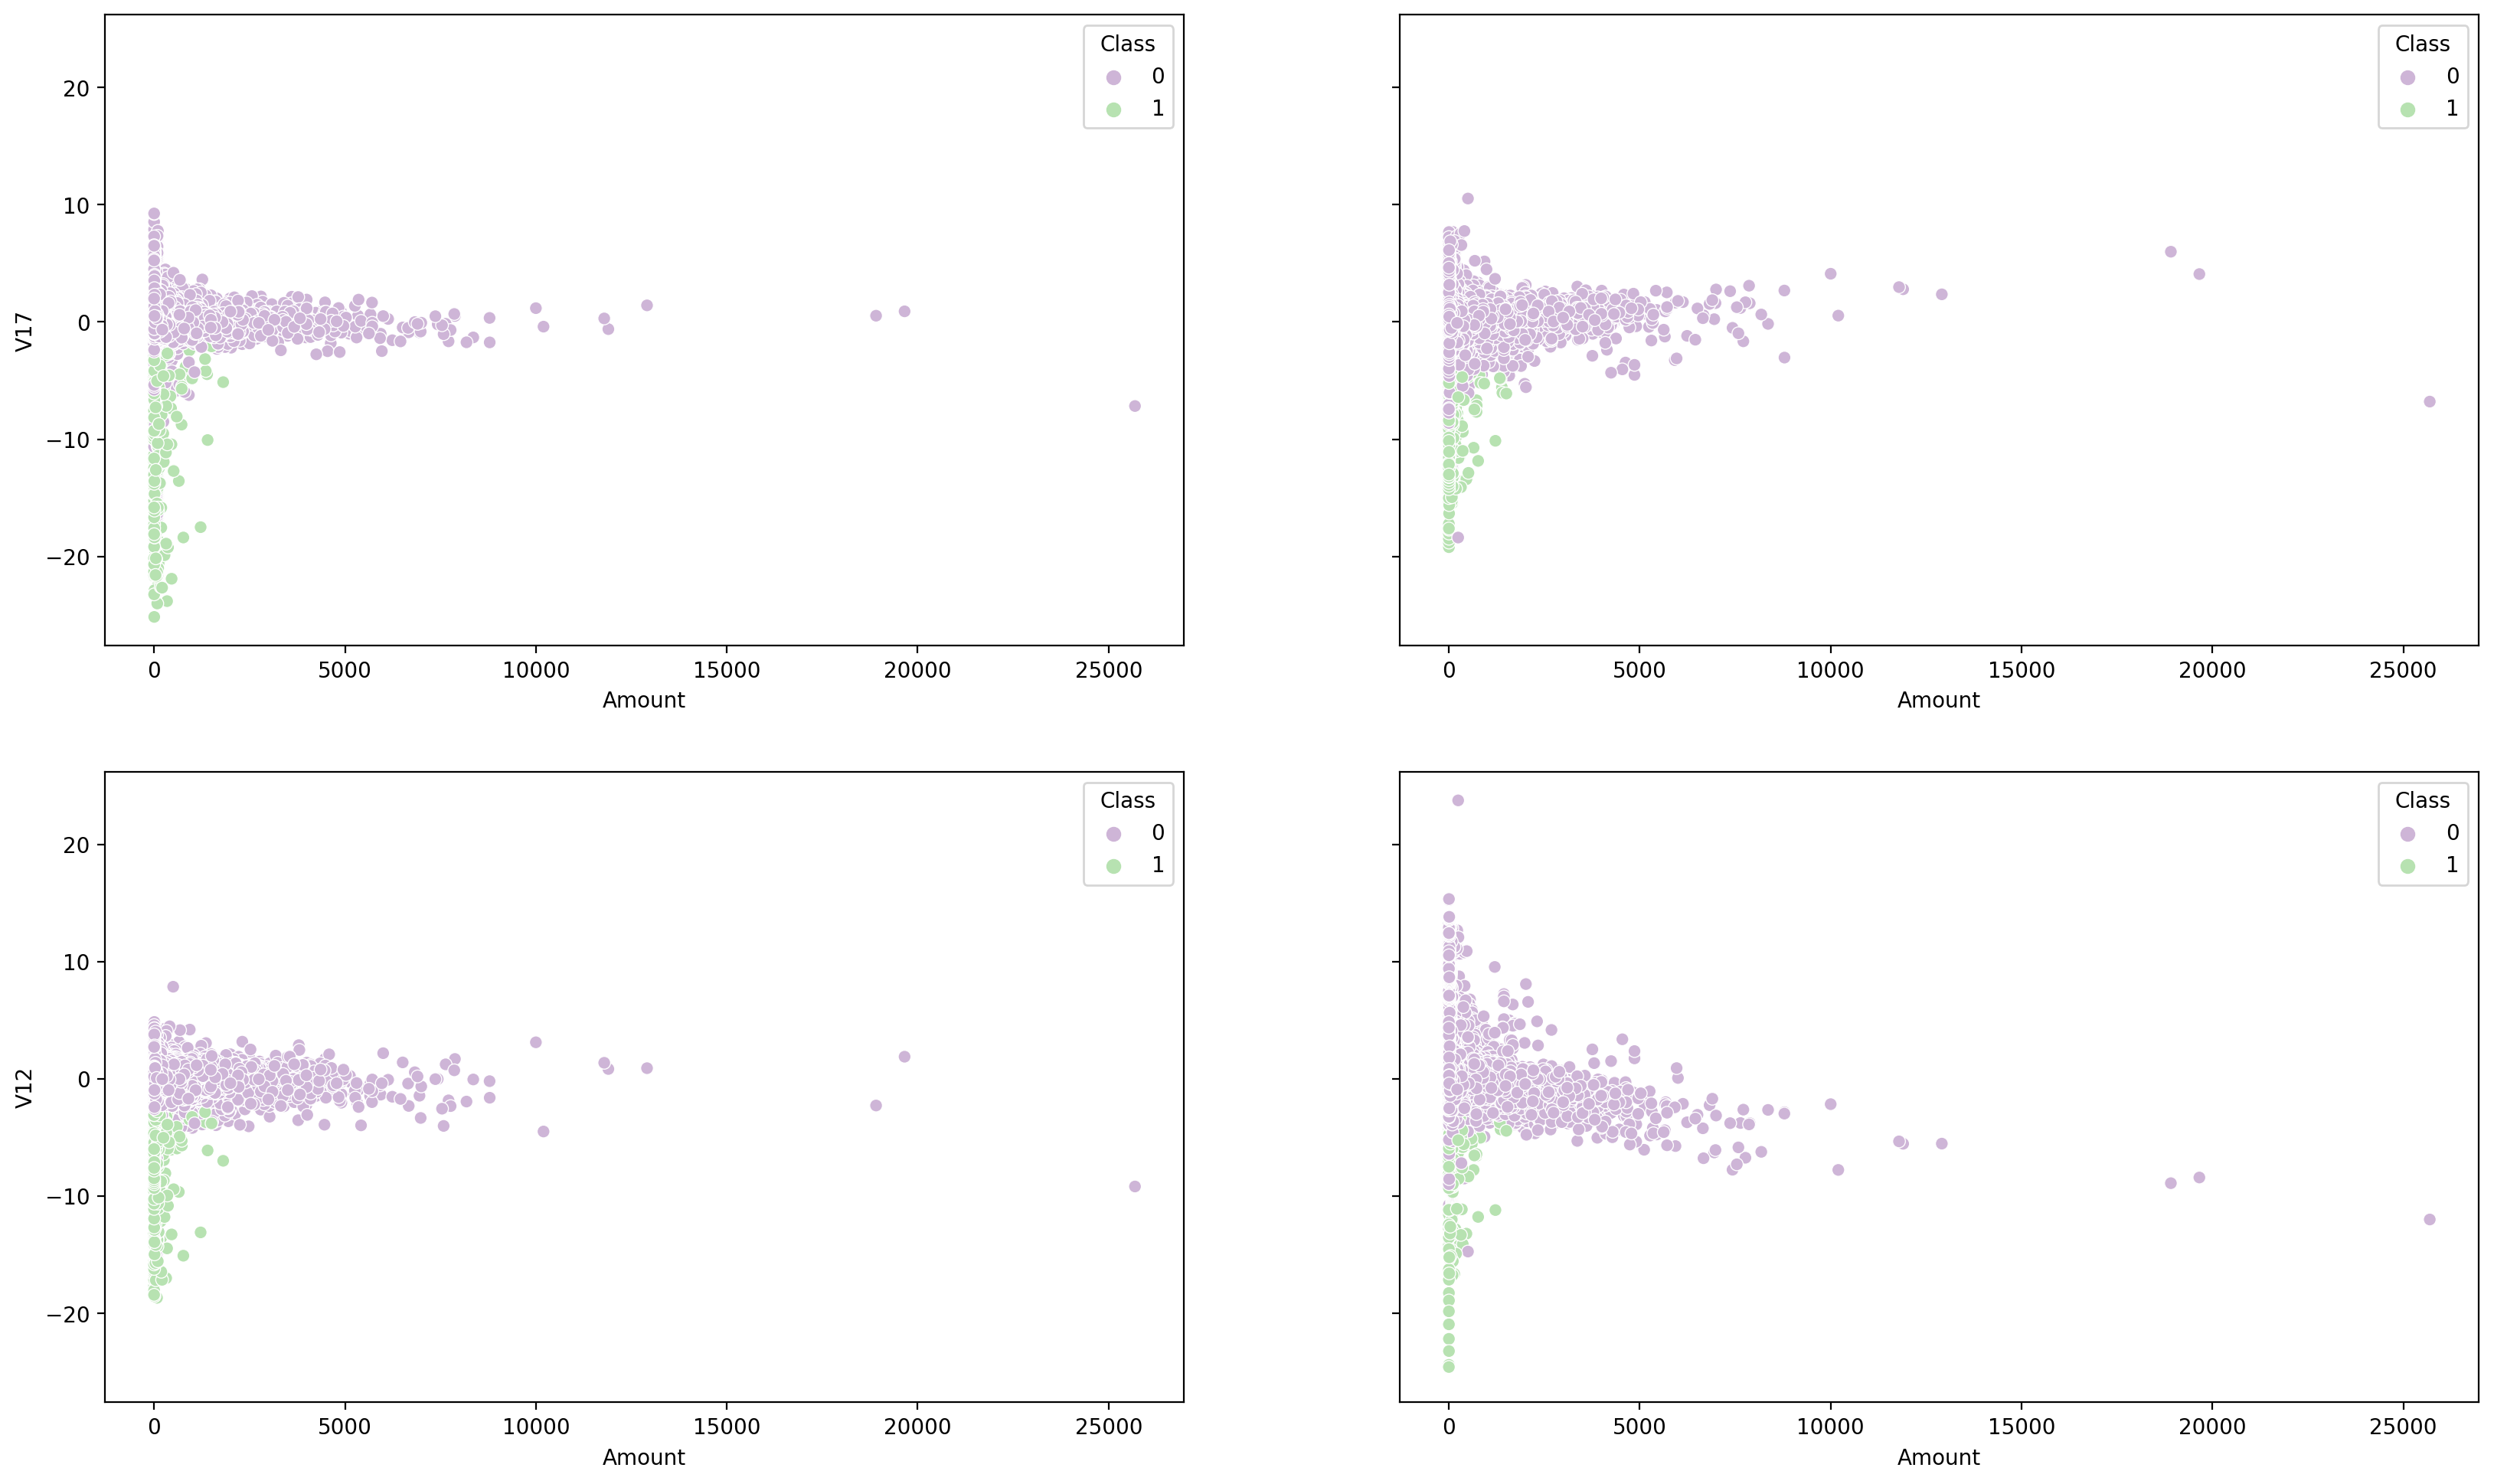

In [14]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V17', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V14', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V12', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V10', hue = 'Class',  ax=ax[1,1], palette='PRGn');

In [15]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

### We set a threshold value for highly correlated columns

In [16]:
df[(df["V17"] < 0.4 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [17]:
df[(df["V14"]< 0.5 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [18]:
df[(df["V12"]< 0.1 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [19]:
df[(df["V10"]< 0.2 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Generated new data to try algorithms.

In [20]:
df_filter = df[(df["Class"] == 1) | (df["V17"]< 0.4) & (df["V14"]< 0.5) & (df["V12"] < 0.1) & (df["V10"]<=0.2)]
df_filter

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
25,22.0,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,...,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.43,0
36,27.0,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,0.138879,...,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,30.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284773,172761.0,-0.066136,0.996296,-0.918564,-0.923242,1.256522,0.047446,0.705820,0.232330,0.213157,...,-0.397210,-1.038099,0.002120,-0.512741,-0.349721,0.168693,0.316674,0.120065,3.57,0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [21]:
df_filter.Class.value_counts()

0    32547
1      473
Name: Class, dtype: int64

In [22]:
df_filter.Class.value_counts(normalize=True)

0    0.985675
1    0.014325
Name: Class, dtype: float64

### Data Cleaning
- Missing Values and Outliers

In [23]:
df.isnull().any().sum()

0

- Outliers

In [24]:
def detect_outliers(data:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(data[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(data[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [25]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
iqr=2
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_filter, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Logarithmed

4342 outliers in 'V1'
8872 outliers in 'V2'
1764 outliers in 'V3'
4750 outliers in 'V4'
5985 outliers in 'V5'
18954 outliers in 'V6'
5725 outliers in 'V7'
17099 outliers in 'V8'
2915 outliers in 'V9'
5624 outliers in 'V10'
312 outliers in 'V11'
8214 outliers in 'V12'
403 outliers in 'V13'
6998 outliers in 'V14'
565 outliers in 'V15'
2860 outliers in 'V16'
3899 outliers in 'V17'
1717 outliers in 'V18'
4449 outliers in 'V19'
20631 outliers in 'V20'
11071 outliers in 'V21'
599 outliers in 'V22'
13211 outliers in 'V23'
446 outliers in 'V24'
2206 outliers in 'V25'
1254 outliers in 'V26'
27395 outliers in 'V27'
21051 outliers in 'V28'
25950 outliers in 'Amount'

229261 OUTLIERS TOTALLY


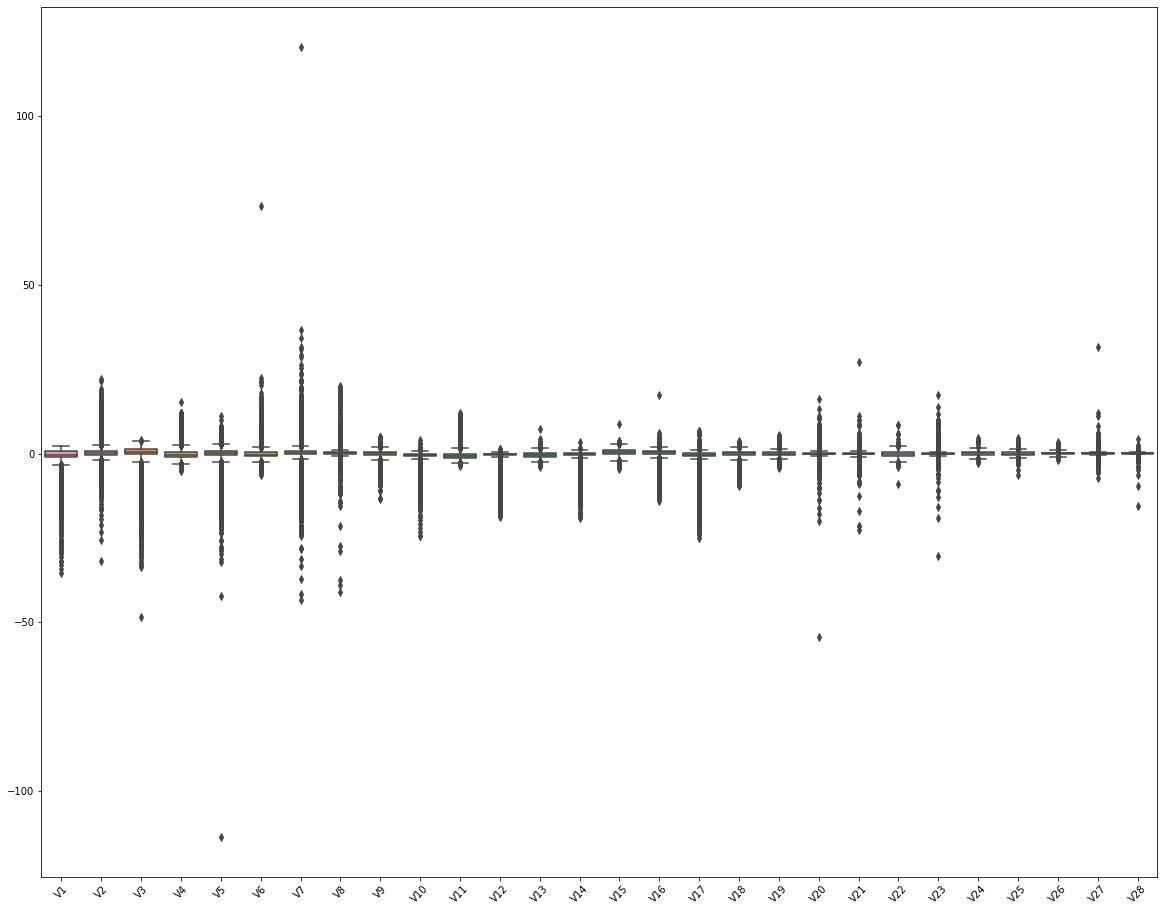

In [26]:
plt.figure(figsize=(20,16))
sns.boxplot(data = df_filter.loc[:,(df_filter.columns != 'Time') & (df_filter.columns != 'Amount')& (df_filter.columns != 'Class')])
plt.xticks(rotation=45);

In [27]:
df_filter[df_filter.Class == 0].Amount.describe()

count    32547.000000
mean        94.274576
std        324.566115
min          0.000000
25%          4.260000
50%         18.710000
75%         70.000000
max      25691.160000
Name: Amount, dtype: float64

In [28]:
df_filter[df_filter.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [29]:
df_filter[df_filter.Class == 0].Time.describe()

count     32547.000000
mean      93890.345009
std       46473.829905
min           0.000000
25%       54425.000000
50%       80167.000000
75%      138588.000000
max      172792.000000
Name: Time, dtype: float64

In [30]:
df_filter[df_filter.Class == 1].Time.describe()

count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

## 2. Data Preprocessing

In [31]:
# Data Pre-processing Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import optuna
optuna.logging.set_verbosity(0)
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)
import warnings
warnings.filterwarnings("ignore")

## Comparison of models with scale (No Smote) in Orjinal Data 

In [32]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []



for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score train" : f1_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

[01:01:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score train
0,XGB,0.999554,1.000000,0.746269,1.000000,0.840336,1.000000
1,RF,0.999507,1.000000,0.723881,1.000000,0.822034,1.000000
2,SVM,0.999366,0.999698,0.634328,0.837758,0.758929,0.904459
3,ADA,0.999248,0.999230,0.634328,0.684366,0.726496,0.752026
4,LR,0.999166,0.999194,0.552239,0.622419,0.675799,0.725086
5,GBC,0.999060,0.999074,0.477612,0.530973,0.615385,0.661765
6,LightGBM,0.993632,0.996022,0.641791,0.716814,0.240896,0.380878


**Overfitting !!!**

## Comparison of the models with scaling in df_filter

In [33]:
X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []
precision_scores = []
precision_scores_train = []


for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    precision_scores.append(precision_score(y_test,y_pred))    
    precision_scores_train.append(precision_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score Train" : f1_scores_train,\
             "Precision Score Test":precision_scores, "Precision Score Train":precision_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

[01:15:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score Train,Precision Score Test,Precision Score Train
0,ADA,0.999192,0.999481,0.962121,0.982405,0.969466,0.982405,0.976923,0.982405
1,RF,0.998890,1.000000,0.946970,1.000000,0.957854,1.000000,0.968992,1.000000
2,XGB,0.998789,1.000000,0.931818,1.000000,0.953488,1.000000,0.976190,1.000000
3,GBC,0.998486,0.999957,0.931818,0.997067,0.942529,0.998532,0.953488,1.000000
4,LightGBM,0.997779,1.000000,0.886364,1.000000,0.914062,1.000000,0.943548,1.000000
5,SVM,0.997476,0.998572,0.833333,0.920821,0.897959,0.950076,0.973451,0.981250
6,LR,0.995356,0.995414,0.787879,0.780059,0.818898,0.833856,0.852459,0.895623


In [34]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

- ## With Smote and Scale

In [35]:
scaler = StandardScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []
precision_scores = []
precision_scores_train = []

for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    precision_scores.append(precision_score(y_test,y_pred))    
    precision_scores_train.append(precision_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score Train" : f1_scores_train,\
             "Precision Score Test":precision_scores, "Precision Score Train":precision_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

[01:16:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score Train,Precision Score Test,Precision Score Train
0,XGB,0.996672,1.000000,0.995904,1.000000,0.996669,1.000000,0.997436,1.000000
1,LightGBM,0.996416,1.000000,0.995904,1.000000,0.996414,1.000000,0.996925,1.000000
2,RF,0.995648,1.000000,0.993856,1.000000,0.995640,1.000000,0.997431,1.000000
3,GBC,0.994368,0.998354,0.991295,0.998025,0.994350,0.998353,0.997424,0.998682
4,ADA,0.993856,0.997586,0.992320,0.997805,0.993846,0.997586,0.995378,0.997367
5,SVM,0.988991,0.991989,0.982079,0.987050,0.988915,0.991949,0.995846,0.996896
6,LR,0.985151,0.983319,0.977983,0.974539,0.985044,0.983171,0.992208,0.991957


## Train and Test results for LightGBM Classifier model

---------------------Test Scores---------------------
[[1947    6]
 [   8 1945]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1953
           1       1.00      1.00      1.00      1953

    accuracy                           1.00      3906
   macro avg       1.00      1.00      1.00      3906
weighted avg       1.00      1.00      1.00      3906

---------------------Train Scores---------------------
[[4556    0]
 [   0 4556]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4556
           1       1.00      1.00      1.00      4556

    accuracy                           1.00      9112
   macro avg       1.00      1.00      1.00      9112
weighted avg       1.00      1.00      1.00      9112



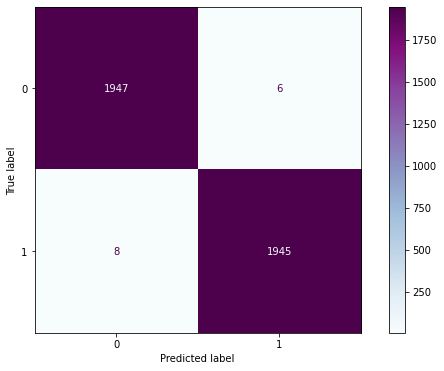

In [36]:
lgbmc_model= LGBMClassifier(random_state=42)
lgbmc_model.fit(X_train, y_train)
y_pred = lgbmc_model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = lgbmc_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(lgbmc_model, X_test, y_test,cmap="BuPu");

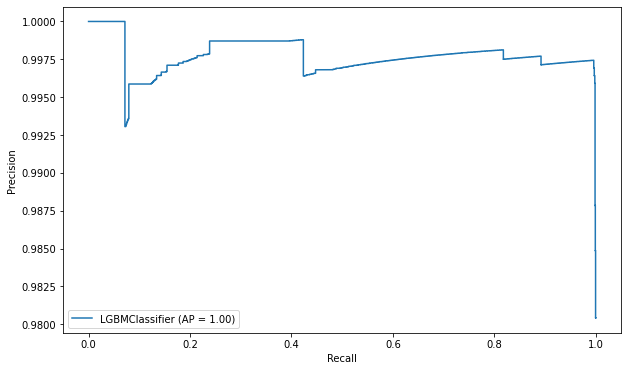

In [37]:
plot_precision_recall_curve(lgbmc_model, X_test, y_test);

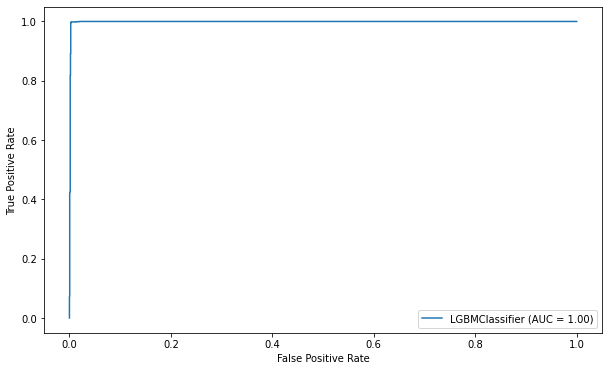

In [38]:
plot_roc_curve(lgbmc_model,X_test,y_test);

- ## Model optimization with Optuna

In [39]:
def objective(trial):
    X= df_filter.drop('Class', axis=1)
    y= df_filter['Class']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param = {"n_estimators": trial.suggest_int("n_estimators",100, 600),
        "max_depth": trial.suggest_int("max_depth",2, 16),
        "learning_rate": trial.suggest_float("learning_rate", 0.01 , 0.1),
        "subsample": trial.suggest_float("subsample",0.2, 1),
    }

    lgbmc_model_optuna = LGBMClassifier(**param,random_state=42)

    lgbmc_model_optuna.fit(X_train, y_train)

    preds = lgbmc_model_optuna.predict(X_test)
    pred_labels = np.rint(preds)
    recall = recall_score(y_test, pred_labels)
    return recall

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-12-24 01:16:51,356] A new study created in memory with name: no-name-2f13780a-4523-42c2-a361-227b15e9a863
[I 2021-12-24 01:16:53,396] Trial 0 finished with value: 0.8787878787878788 and parameters: {'n_estimators': 441, 'max_depth': 14, 'learning_rate': 0.02943079826696756, 'subsample': 0.8290794033603452}. Best is trial 0 with value: 0.8787878787878788.
[I 2021-12-24 01:16:54,502] Trial 1 finished with value: 0.9015151515151515 and parameters: {'n_estimators': 310, 'max_depth': 9, 'learning_rate': 0.09393589620153356, 'subsample': 0.8024020193614432}. Best is trial 1 with value: 0.9015151515151515.
[I 2021-12-24 01:16:56,347] Trial 2 finished with value: 0.8863636363636364 and parameters: {'n_estimators': 554, 'max_depth': 5, 'learning_rate': 0.017814769565051427, 'subsample': 0.29635854884169793}. Best is trial 1 with value: 0.9015151515151515.
[I 2021-12-24 01:16:57,914] Trial 3 finished with value: 0.8787878787878788 and parameters: {'n_estimators': 368, 'max_depth': 14, 'l

Number of finished trials: 100
Best trial:
  Value: 0.9090909090909091
  Params: 
    n_estimators: 346
    max_depth: 10
    learning_rate: 0.05162891478383659
    subsample: 0.7226249579979843


In [40]:
model = LGBMClassifier(n_estimators = 189, max_depth = 13, learning_rate = 0.058037435219451684,subsample = 0.8422194436234953)

---------------------Test Scores---------------------
[[9754   10]
 [  15  127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9764
           1       0.93      0.89      0.91       142

    accuracy                           1.00      9906
   macro avg       0.96      0.95      0.95      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores---------------------
[[22783     0]
 [    0   331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22783
           1       1.00      1.00      1.00       331

    accuracy                           1.00     23114
   macro avg       1.00      1.00      1.00     23114
weighted avg       1.00      1.00      1.00     23114



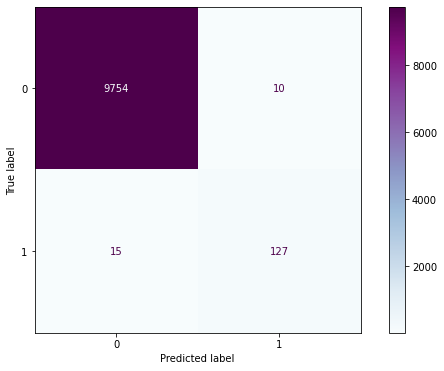

In [41]:
X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(model, X_test, y_test,cmap="BuPu");

## Feature Importance (df_filter)

In [42]:
feature_importance = model.feature_importances_
features = df_filter.drop(columns="Class").columns
fi={'features':features,'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=True,inplace=True)
fig = px.bar(df_fi, x='feature_importance', y='features',title="LGBMC Feature Importance",height=500)
fig.show()

## Default results (without Cross-validation) without applying smote to selected columns.

---------------------Test Scores---------------------
[[9753   11]
 [  16  126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9764
           1       0.92      0.89      0.90       142

    accuracy                           1.00      9906
   macro avg       0.96      0.94      0.95      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores---------------------
[[22782     1]
 [    1   330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22783
           1       1.00      1.00      1.00       331

    accuracy                           1.00     23114
   macro avg       1.00      1.00      1.00     23114
weighted avg       1.00      1.00      1.00     23114



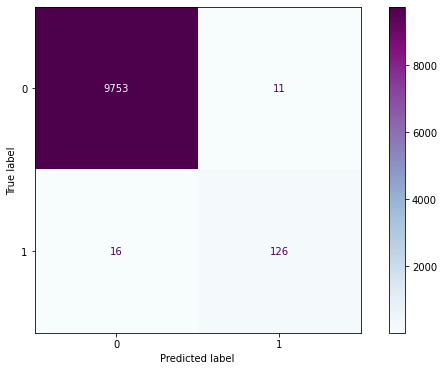

In [43]:
df_filter_feature = df_filter[["V14","V4","Amount","V17","V12","V11"]]
df_filter_feature["Class"] = df.Class
X = df_filter_feature.drop(columns="Class")
y = df_filter_feature.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(model, X_test, y_test,cmap="BuPu");

- ## Results by applying smote

---------------------Test Scores---------------------
[[1943   10]
 [  15 1938]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1953
           1       0.99      0.99      0.99      1953

    accuracy                           0.99      3906
   macro avg       0.99      0.99      0.99      3906
weighted avg       0.99      0.99      0.99      3906

---------------------Train Scores---------------------
[[4556    0]
 [   0 4556]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4556
           1       1.00      1.00      1.00      4556

    accuracy                           1.00      9112
   macro avg       1.00      1.00      1.00      9112
weighted avg       1.00      1.00      1.00      9112



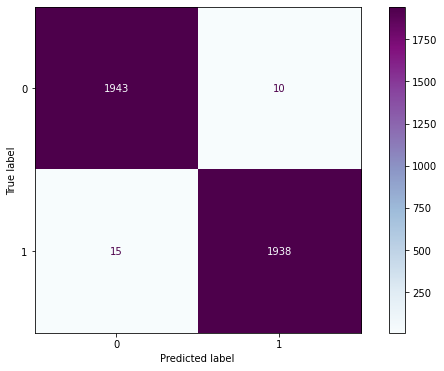

In [44]:
over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(model, X_test, y_test,cmap="BuPu");

## Determining the columns selected with the original data and seeing the results

---------------------Test Scores---------------------
[[16868   127]
 [  118 16877]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16995
           1       0.99      0.99      0.99     16995

    accuracy                           0.99     33990
   macro avg       0.99      0.99      0.99     33990
weighted avg       0.99      0.99      0.99     33990

---------------------Train Scores---------------------
[[39464   191]
 [  164 39491]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39655
           1       1.00      1.00      1.00     39655

    accuracy                           1.00     79310
   macro avg       1.00      1.00      1.00     79310
weighted avg       1.00      1.00      1.00     79310



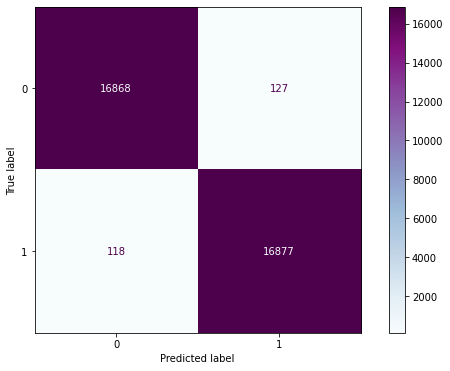

In [45]:
df_final = df[["V14","V12","V4","V10","Amount","V17"]]
df_final["Class"] = df.Class
X = df_final.drop(columns="Class")
y = df_final.Class

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(model, X_test, y_test,cmap="BuPu");

## Save and Export the Model as .pkl

In [46]:
final_scaler = StandardScaler()
final_scaler.fit(X)

StandardScaler()

In [47]:
model.fit(X,y)

LGBMClassifier(learning_rate=0.058037435219451684, max_depth=13,
               n_estimators=189, subsample=0.8422194436234953)

In [48]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(final_scaler, open('scaler.pkl', 'wb'))

### Neural Network

Classification with Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

***i. Import Libraries***

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

***ii. Define Model***

In [50]:
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
______________________________________________________


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

***iii. Compile Model***

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

***iv. Fit Model***

In [52]:
model.fit(x = X_train, y = y_train, 
          batch_size = 30, epochs = 10)

2021-12-24 01:19:08.757029: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1605 - accuracy: 0.9403
Epoch 2/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1262 - accuracy: 0.9506
Epoch 3/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1202 - accuracy: 0.9528
Epoch 4/10
2644/2644 [==============================] - 7s 3ms/step - loss: 0.1168 - accuracy: 0.9543
Epoch 5/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1115 - accuracy: 0.9553
Epoch 6/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1088 - accuracy: 0.9570
Epoch 7/10
2644/2644 [==============================] - 7s 2ms/step - loss: 0.1079 - accuracy: 0.9568
Epoch 8/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1061 - accuracy: 0.9578
Epoch 9/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1038 - accuracy: 0.9586
Epoch 10/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.102

***v. Prediction and Model Evaluating***

In [53]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred.round()))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred.round()))

[[16786   209]
 [ 1127 15868]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     16995
           1       0.99      0.93      0.96     16995

    accuracy                           0.96     33990
   macro avg       0.96      0.96      0.96     33990
weighted avg       0.96      0.96      0.96     33990



In [54]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10)
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose = 1,callbacks = [early_stop])

Epoch 1/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1449 - accuracy: 0.9470 - val_loss: 0.1144 - val_accuracy: 0.9551
Epoch 2/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1168 - accuracy: 0.9554 - val_loss: 0.1077 - val_accuracy: 0.9568
Epoch 3/500
2231/2231 [==============================] - 4s 2ms/step - loss: 0.1105 - accuracy: 0.9572 - val_loss: 0.1038 - val_accuracy: 0.9591
Epoch 4/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1071 - accuracy: 0.9580 - val_loss: 0.1005 - val_accuracy: 0.9586
Epoch 5/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1043 - accuracy: 0.9589 - val_loss: 0.0994 - val_accuracy: 0.9597
Epoch 6/500
2231/2231 [==============================] - 4s 2ms/step - loss: 0.1013 - accuracy: 0.9597 - val_loss: 0.1017 - val_accuracy: 0.9599
Epoch 7/500
2231/2231 [==============================] - 4s 2ms/step - loss: 0.0995 - accuracy: 0.9608 - val_loss: 0.0996 - val_ac

<AxesSubplot:>

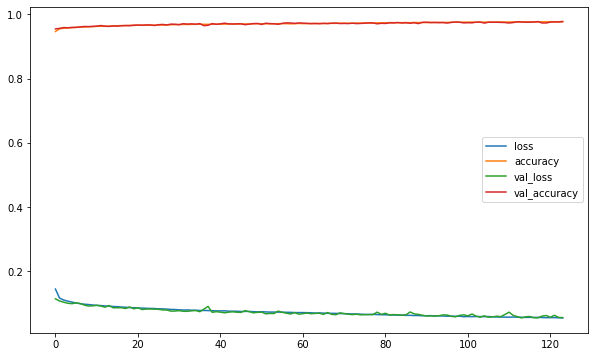

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [56]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("\033[1m---------------------Train Scores---------------------\033[0m")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

---------------------Test Scores---------------------
[[16726   269]
 [  527 16468]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16995
           1       0.98      0.97      0.98     16995

    accuracy                           0.98     33990
   macro avg       0.98      0.98      0.98     33990
weighted avg       0.98      0.98      0.98     33990

---------------------Train Scores---------------------
[[39058   597]
 [ 1163 38492]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     39655
           1       0.98      0.97      0.98     39655

    accuracy                           0.98     79310
   macro avg       0.98      0.98      0.98     79310
weighted avg       0.98      0.98      0.98     79310

